## Process GPX data


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
file_name='Roll_Test_3.gpx'
with open(file_name) as f:
    lines = f.readlines()
lines=lines[17:-3]
#lines


C:\Users\matth\AppData\Local\Temp\ipykernel_20544\2574050132.py:45: RuntimeWarning: invalid value encountered in double_scalars
  speed=distance/delta_t#meters per secound
c:\Users\matth\OneDrive\Documents\Racing\code\BatteryTestRig\racing\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='time'>

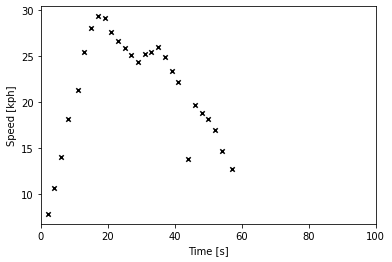

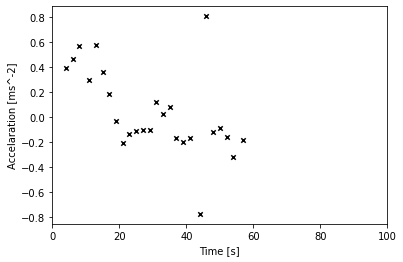

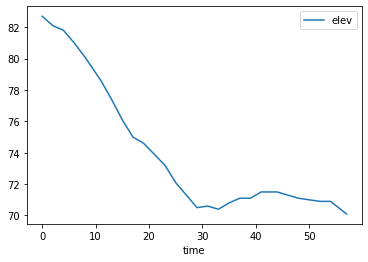

In [179]:
df = pd.DataFrame(columns=['time','speed'])

init_minutes=int(str(lines[0])[79:81])
init_secounds=int(str(lines[0])[82:84])

lat=float(str(lines[0])[13:24])
lon=float(str(lines[0])[31:42])
ele1=float(str(lines[0])[49:53])

lat, lon = np.deg2rad(lat), np.deg2rad(lon);

R = 6371 # radius of the earth
x1 = R * np.cos(lat) * np.cos(lon);
y1 = R * np.cos(lat) * np.sin(lon);

t1=0
v1=0

for index in range(len(lines)):
#for index in range(5):
    lat=float(str(lines[index])[13:24])
    lon=float(str(lines[index])[31:42])
    ele=float(str(lines[index])[49:53])

    lat, lon = np.deg2rad(lat), np.deg2rad(lon);

    x_abs = R * np.cos(lat) * np.cos(lon);
    y_abs = R * np.cos(lat) * np.sin(lon);

    x_rel=x_abs-x1
    y_rel=y_abs-y1
    distance=((x_rel**2+y_rel**2)**0.5)*1000# pythag
    x1=x_abs
    y1=y_abs

    min_time=int(str(lines[index])[79:81])-init_minutes
    sec_time=int(str(lines[index])[82:84])-init_secounds
    time=sec_time+min_time*60
    delta_t=time-t1
    t1=time

    delta_h=ele-ele1
    ele1=ele

    speed=distance/delta_t#meters per secound
    acc=(speed-v1)/delta_t
    v1=speed
    speed=speed*60**2/1000#convert to kph

    ele

    df_working = pd.DataFrame([[time,speed,acc,x_rel,y_rel,ele,delta_h,distance]],columns=['time','speed','acc','x_rel','y_rel','elev','d_h','delta_dist'])
    df=pd.concat([df,df_working])

df["roll_mean_speed"]=df.rolling(window=3)['speed'].mean()

df.plot(kind='scatter',marker='x',x='time',y='speed',xlabel="Time [s]",ylabel="Speed [kph]",xlim=[0,100], c="k")
df.plot(kind='scatter',marker='x', x='time', y='acc', xlabel='Time [s]', ylabel='Accelaration [ms^-2]', xlim=[0,100], c='k')

df.plot('time','elev')

c:\Users\matth\OneDrive\Documents\Racing\code\BatteryTestRig\racing\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='time'>

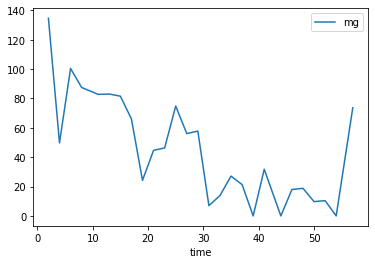

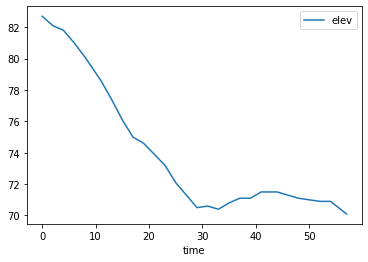

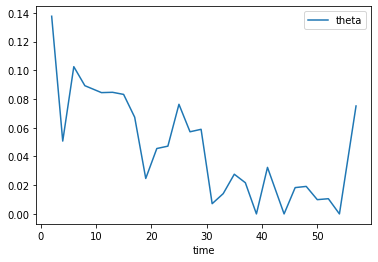

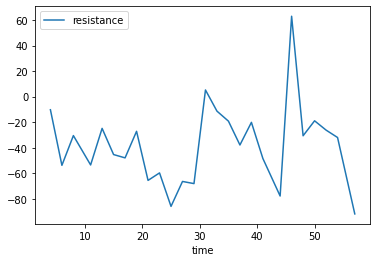

In [180]:
# code to extract metrics from force balance
#df['d_h']=df.rolling(window=3)['d_h'].mean()
df

m=100

df["ma"]=m*df['acc']

df["theta"]=np.arctan(np.abs(df["d_h"])/np.abs(df["delta_dist"]))
df["mg"]=9.81*m*np.sin(df["theta"])

df["resistance"]=df["ma"]-df["mg"]

df.plot("time","mg")
df.plot("time","elev")
df.plot("time","theta")
df.plot("time","resistance")

#df